In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib notebook
plt.ioff()

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [3]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] â‰ˆ x(t_i)
    """
    # find h
    h = (t[-1] - t[0])/ (len(t)-1)

    x_t = [x0]
    x_i = x0
    
    for t_i in t[:-1]:
        x_i = x_i + h * f(x_i, t_i)
        x_t.append(x_i)
        
    return np.array(x_t)



<IPython.core.display.Javascript object>


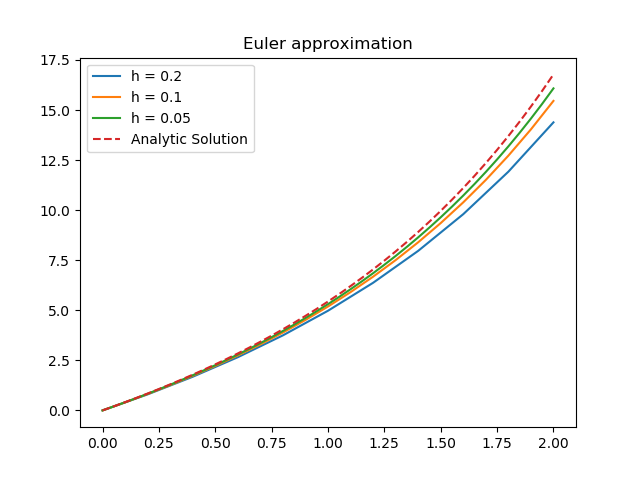

In [4]:
# define different time arrays
t_1 = np.linspace(0,2,int(2/.2)+1)
t_2 = np.linspace(0,2,int(2/.1)+1)
t_3 = np.linspace(0,2,int(2/.05)+1)

# define f
f = lambda x_t, t: x_t - 2*t + 4

# use euler function to approximate x(t)
x_1 = euler(f,0,t_1)
x_2 = euler(f,0,t_2)
x_3 = euler(f,0,t_3)

# Analytical solution
x_t = lambda t: -2 + 2*t + 2*np.exp(t)

# plot
plt.plot(t_1, x_1, label = "h = 0.2")
plt.plot(t_2, x_2, label = "h = 0.1")
plt.plot(t_3, x_3, label = "h = 0.05")
plt.plot(t_3, x_t(t_3), '--',label = "Analytic Solution")
plt.title("Euler approximation")
plt.legend()
plt.show()


## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [5]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] â‰ˆ x(t_i)
    """
    # find h
    h = (t[-1] - t[0])/ (len(t)-1)
    
    x_t = [x0]
    x_i = x0
    for t_i in t[:-1]:
        # Take an euler half step
        a = x_i + h/2*f(x_i,t_i)
        x_i = x_i + h*f(a,t_i + h/2)
        x_t.append(x_i)
    
    return np.array(x_t)

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] â‰ˆ x(t_i)
    """
    # find h
    h = (t[-1] - t[0])/ (len(t)-1)
    x_t = [x0]
    x_i = x0
    for t_i in t[:-1]:
        k1 = f(x_i, t_i)
        k2 = f(x_i + h/2 * k1, t_i + h/2 )
        k3 = f(x_i + h/2 * k2, t_i + h/2 )
        k4 = f(x_i + h * k3, t_i + h)
        
        x_i = x_i + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        x_t.append(x_i)
 
    return np.array(x_t)
    
    

In [6]:
# plot each approximation method for 0 < t < 2, h = 0.2
h = [.2,.1,.05,.025,.0125]
t = [np.linspace(0,2,int(2./h_)+1) for h_ in h]
f = lambda x,t: x - 2*t + 4

x_euler = [euler(f, 0, t_) for t_ in t]
x_mid = [midpoint(f, 0, t_) for t_ in t]
x_rk4 = [rk4(f, 0, t_) for t_ in t]

f_exact = lambda t : -2 + 2*t + 2*np.exp(t)



<IPython.core.display.Javascript object>


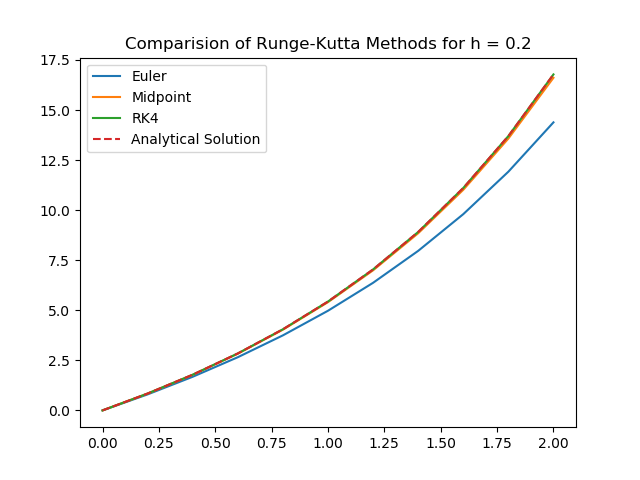

In [7]:
# Plot a comparison for h = 0.2
plt.plot(t[0], x_euler[0], label = "Euler")
plt.plot(t[0], x_mid[0], label = "Midpoint")
plt.plot(t[0], x_rk4[0], label = "RK4")
plt.plot(t[0], f_exact(t[0]), '--', label = "Analytical Solution")
plt.title("Comparision of Runge-Kutta Methods for h = 0.2")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


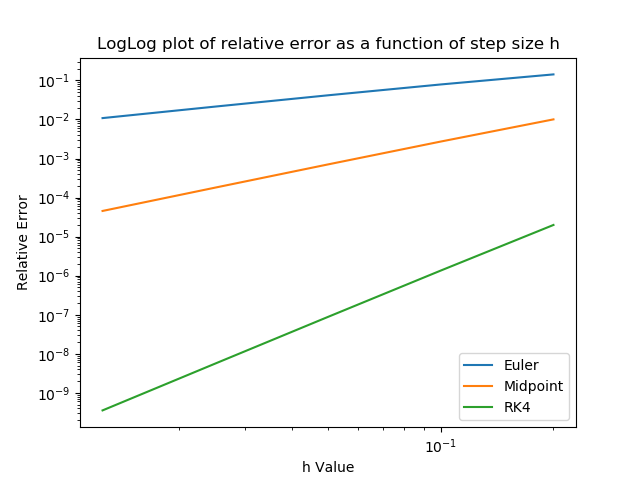

In [8]:
# Plot a loglog comparison of relative error x(2) - xi(2) / x(2)
x_2 = f_exact(2)

plt.loglog(h,[(x_2 - xn[-1]) / x_2 for xn in x_euler],label="Euler")
plt.loglog(h,[(x_2 - xn[-1]) / x_2 for xn in x_mid], label="Midpoint")
plt.loglog(h,[(x_2 - xn[-1]) / x_2 for xn in x_rk4], label="RK4")
plt.legend()
plt.xlabel("h Value")
plt.ylabel("Relative Error")
plt.title("LogLog plot of relative error as a function of step size h")
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

Let 
$$\begin{align}
    \begin{split}
&{}x_1 = y \\
&{}x_2 = y'\\
    \end{split}
\end{align}$$
Then 
$$
\begin{align}
{\bf x}' = f({\bf x}(t), t) = \begin{bmatrix} x_2 \\ \frac{-k}{m} x_1 \end{bmatrix}
\end{align}
$$
And
$$
{\bf x_o}= \begin{bmatrix} x_1(0) \\ x_2(0) \end{bmatrix} = \begin{bmatrix} y(0) \\ y'(0) \end{bmatrix} = \begin{bmatrix} 2 \\ -1 \end{bmatrix}
$$

<IPython.core.display.Javascript object>


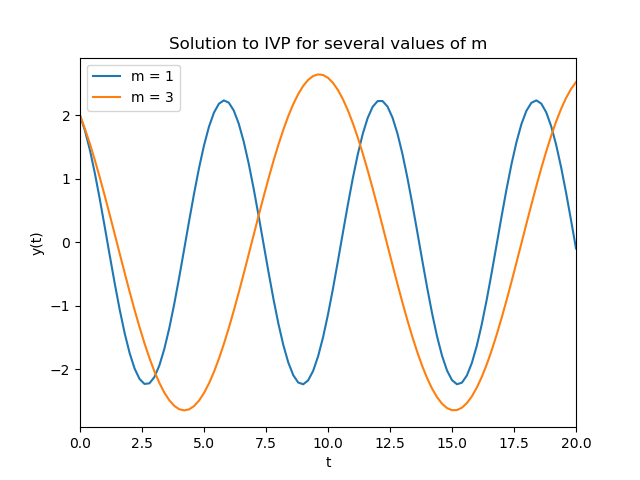

In [9]:
# First case, k = m = 1
# Second case, k = 1, m = 3
f = lambda x, t : np.array([x[1], -x[0]])
f_2 =  lambda x, t : np.array([x[1], -x[0]/3])

x_0 = np.array([2.,-1.])
t = np.linspace(0,20,int(20/.2)+1)
plt.plot(t, rk4(f,x_0, t)[:,0], label = "m = 1")
plt.plot(t, rk4(f_2, x_0, t)[:,0], label = "m = 3")
plt.legend()
plt.title("Solution to IVP for several values of m")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.xlim(0,20)
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

Let 
$$\begin{align}
    \begin{split}
&{}x_1 = y \\
&{}x_2 = y'\\
    \end{split}
\end{align}$$
Then 
$$
\begin{align}
{\bf x}' = f({\bf x}(t), t) = \begin{bmatrix} x_2 \\ -x_1-\gamma x_2 \end{bmatrix}
\end{align}
$$
And
$$
{\bf x_o}= \begin{bmatrix} x_1(0) \\ x_2(0) \end{bmatrix} = \begin{bmatrix} y(0) \\ y'(0) \end{bmatrix} = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
$$

<IPython.core.display.Javascript object>


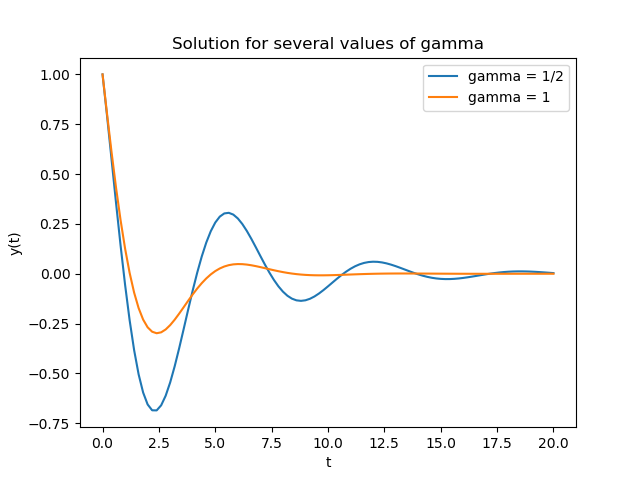

In [10]:
f1 = lambda x,t: np.array([x[1], -x[0] - x[1]/2])
f2 = lambda x,t: np.array([x[1], -x[0] - x[1]])

x_0 = np.array([1.,-1.])
t = np.linspace(0,20,int(20/.2)+1)

plt.plot(t,rk4(f1,x_0,t)[:,0],label="gamma = 1/2")
plt.plot(t,rk4(f2,x_0,t)[:,0],label="gamma = 1")
plt.title("Solution for several values of gamma")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()


## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

Let 
$$\begin{align}
    \begin{split}
&{}x_1 = y \\
&{}x_2 = y'\\
    \end{split}
\end{align}$$
Then 
$$
\begin{align}
{\bf x}' = f({\bf x}(t), t) = \begin{bmatrix} x_2 \\ -x_1 -\frac{\gamma x_2}{2} + cos(\omega t) \end{bmatrix}
\end{align}
$$
And
$$
{\bf x_o}= \begin{bmatrix} x_1(0) \\ x_2(0) \end{bmatrix} = \begin{bmatrix} y(0) \\ y'(0) \end{bmatrix} = \begin{bmatrix} 2 \\ -1 \end{bmatrix}
$$

<IPython.core.display.Javascript object>


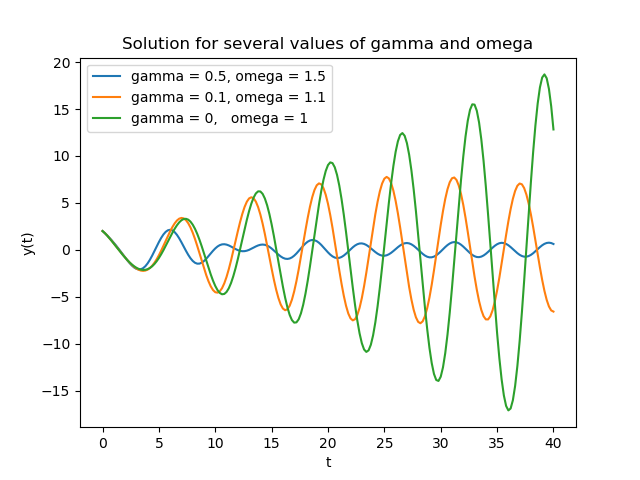

In [11]:
f1 = lambda x,t : np.array([x[1],-x[0]-0.5*x[1]/2+np.cos(1.5*t)])
f2 = lambda x,t : np.array([x[1],-x[0]-0.1*x[1]/2+np.cos(1.1*t)])
f3 = lambda x,t : np.array([x[1],-x[0]-0*x[1]/2+np.cos(1.*t)])

x_0 = np.array([2.,-1.])
t = np.linspace(0,40,int(40/.2)+1)

plt.plot(t,rk4(f1,x_0,t)[:,0],label="gamma = 0.5, omega = 1.5")
plt.plot(t,rk4(f2,x_0,t)[:,0],label="gamma = 0.1, omega = 1.1")
plt.plot(t,rk4(f3,x_0,t)[:,0],label="gamma = 0,   omega = 1")
plt.title("Solution for several values of gamma and omega")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()